## Assignment

In this assignment, you'll continue working with the __[U.S. Education Dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home)__ from Kaggle. The data gives detailed state level information on the several facets of the state of education on an annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above. You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

- postgres_user = 'dsbc_student'
- postgres_pw = '7*.8G9QH21'
- postgres_host = '142.93.121.174'
- postgres_port = '5432'
- postgres_db = 'useducation'

Don't forget to apply the most suitable missing value filling techniques you applied in the previous checkpoint to the data. You're supposed to provide your answers to the following questions after you handled the missing values.

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Derive the descriptive statistics of the data and discuss the points you find remarkable.
2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.
3. In your chosen state, which of the lessons are the students more successful, math or reading?
4. What are the distributions of the math and reading scores in the sample?
5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

### Import Statements

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

### Dataframe

In [8]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

### Cleaning Up Missing Values

In [9]:
education_df_without_nan_values = education_df.copy()

replace_nan_values_with_averages_list = ['ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 
             'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE', 
             'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE',
             'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 
             'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G', 
             'GRADES_9_12_G', 'GRADES_ALL_G']

for col in replace_nan_values_with_averages_list:
    education_df_without_nan_values.fillna(education_df_without_nan_values[
        replace_nan_values_with_averages_list].mean(), inplace=True)
    
education_df_without_nan_values.isnull().sum()*100/education_df_without_nan_values.isnull().count()   

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           0.000000
TOTAL_REVENUE                    0.000000
FEDERAL_REVENUE                  0.000000
STATE_REVENUE                    0.000000
LOCAL_REVENUE                    0.000000
TOTAL_EXPENDITURE                0.000000
INSTRUCTION_EXPENDITURE          0.000000
SUPPORT_SERVICES_EXPENDITURE     0.000000
OTHER_EXPENDITURE                0.000000
CAPITAL_OUTLAY_EXPENDITURE       0.000000
GRADES_PK_G                      0.000000
GRADES_KG_G                      0.000000
GRADES_4_G                       0.000000
GRADES_8_G                       0.000000
GRADES_12_G                      0.000000
GRADES_1_8_G                     0.000000
GRADES_9_12_G                    0.000000
GRADES_ALL_G                     0.000000
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

### Eliminating Outliers

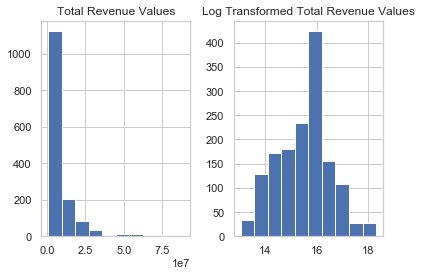

In [10]:
plt.subplot(1, 2, 1)
plt.hist(education_df_without_nan_values['TOTAL_REVENUE'])
plt.title('Total Revenue Values')

plt.subplot(1, 2, 2)
plt.hist(np.log(education_df_without_nan_values['TOTAL_REVENUE']))
plt.title('Log Transformed Total Revenue Values')

plt.tight_layout()
plt.show()

In [12]:
education_df_without_nan_values['TOTAL_REVENUE'] = np.log(education_df_without_nan_values['TOTAL_REVENUE'])

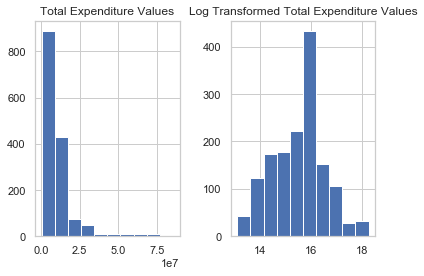

In [14]:
plt.subplot(1, 2, 1)
plt.hist(education_df_without_nan_values['TOTAL_EXPENDITURE'])
plt.title('Total Expenditure Values')

plt.subplot(1, 2, 2)
plt.hist(np.log(education_df_without_nan_values['TOTAL_EXPENDITURE']))
plt.title('Log Transformed Total Expenditure Values')

plt.tight_layout()
plt.show()

In [15]:
education_df_without_nan_values['TOTAL_EXPENDITURE'] = np.log(education_df_without_nan_values['TOTAL_EXPENDITURE'])

### 1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [16]:
education_df_without_nan_values['TOTAL_EXPENDITURE'].describe()

count    1492.000000
mean       15.529101
std         1.023784
min        13.085004
25%        14.741343
50%        15.690419
75%        16.059928
max        18.261921
Name: TOTAL_EXPENDITURE, dtype: float64

In [17]:
education_df_without_nan_values['TOTAL_REVENUE'].describe()

count    1492.000000
mean        2.740114
std         0.066068
min         2.568879
25%         2.691252
50%         2.751456
75%         2.775275
max         2.907261
Name: TOTAL_REVENUE, dtype: float64

In [18]:
# What strikes me is that: in the graphs, the 'TOTAL_REVENUE' and 'TOTAL_EXPENDITURE' look almost identical,
# but the statistics help tease out the differences.

### 2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

In [31]:
fave_state = 'CALIFORNIA'

education_df_without_nan_values[education_df_without_nan_values['STATE'] == fave_state]

education_df_california = education_df_without_nan_values[education_df_without_nan_values['STATE'] == fave_state]

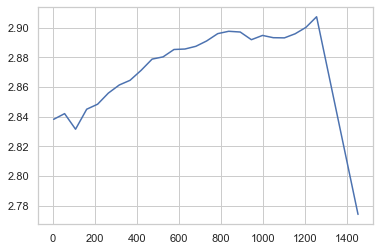

In [65]:
# My lineplots look funky. I need coaching here.

plt.plot(education_df_state_california['TOTAL_REVENUE'])
plt.show()

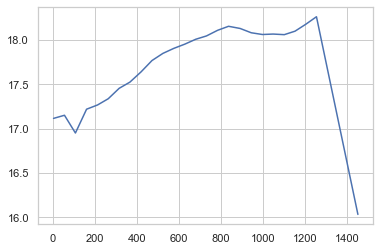

In [33]:
plt.plot(education_df_state_california['TOTAL_EXPENDITURE'])
plt.show()

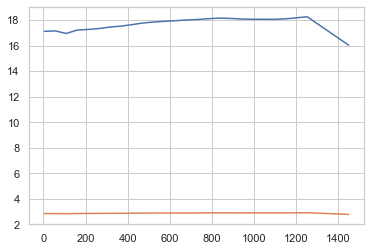

In [35]:
plt.plot(education_df_state_california['TOTAL_EXPENDITURE'])
plt.plot(education_df_state_california['TOTAL_REVENUE'])
plt.show()

### 3. In your chosen state, which of the lessons are the students more successful, math or reading?

In [45]:
print('The average math and reading grades in fourth grade are, respectively:')
print('-', education_df_california['AVG_MATH_4_SCORE'].mean())
print('- ', education_df_california['AVG_READING_4_SCORE'].mean())

The average math and reading grades in fourth grade are, respectively:
- 225.65962456591933
-  207.91154673862786


In [44]:
print('The average math and reading grades in eighth grade are, respectively:')
print('-', education_df_california['AVG_MATH_8_SCORE'].mean())
print('- ', education_df_california['AVG_READING_8_SCORE'].mean())

The average math and reading grades in eighth grade are, respectively:
- 269.35524363566543
-  261.90265181565036


### 4. What are the distributions of the math and reading scores in the sample?

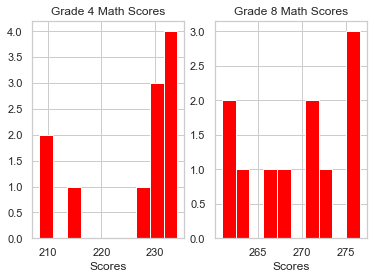

<Figure size 432x288 with 0 Axes>

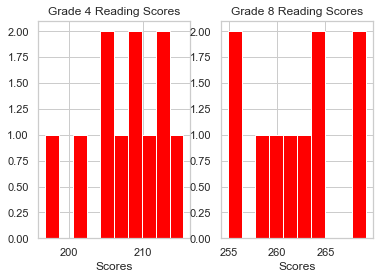

<Figure size 432x288 with 0 Axes>

In [53]:
plt.subplot(1, 2, 1)
plt.hist(education_df_california['AVG_MATH_4_SCORE'], color='red')
plt.title('Grade 4 Math Scores')
plt.xlabel('Scores')

plt.subplot(1, 2, 2)
plt.hist(education_df_california['AVG_MATH_8_SCORE'], color='red')
plt.title('Grade 8 Math Scores')
plt.xlabel('Scores')
plt.show()

plt.tight_layout()
plt.show()

plt.subplot(1, 2, 1)
plt.hist(education_df_california['AVG_READING_4_SCORE'], color='red')
plt.title('Grade 4 Reading Scores')
plt.xlabel('Scores')

plt.subplot(1, 2, 2)
plt.hist(education_df_california['AVG_READING_8_SCORE'], color='red')
plt.title('Grade 8 Reading Scores')
plt.xlabel('Scores')
plt.show()

plt.tight_layout()
plt.show()

### 5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

In [64]:
# I need coaching here.

education_df_california = education_df_california.copy()

replace_nan_values_with_averages_list = ['AVG_READING_4_SCORE', 'AVG_READING_8_SCORE', 'AVG_MATH_4_SCORE','AVG_MATH_8_SCORE']

for col in replace_nan_values_with_averages_list:
    education_df_california.fillna(education_df_california[education_df_california].median(), inplace=True)

ValueError: Must pass DataFrame with boolean values only